In [1]:
import pandas as pd
import numpy as np
import csv
import statsmodels.api as sm

In [2]:
df = pd.read_csv(r'/home/icarus/Downloads/NABIL.csv', index_col = 'Date', parse_dates=True)
print('Shape of data', df.shape)
df.head()

Shape of data (730, 8)


,Price,Change,Max Price,Min Price,Prev Price,Transaction,Volume,Amount
Date,,,,,,,,
2019-03-31,712.0,-2.0,717.0,707.0,714.0,71,7019,4989640
2019-04-01,712.0,0.0,714.0,709.0,712.0,62,11973,8520110
2019-04-02,717.0,5.0,718.0,710.0,712.0,86,15403,10998100
2019-04-03,724.0,7.0,731.0,712.0,717.0,77,14196,10232000
2019-04-04,727.0,3.0,728.0,718.0,724.0,69,8188,5926770


<AxesSubplot:xlabel='Date'>

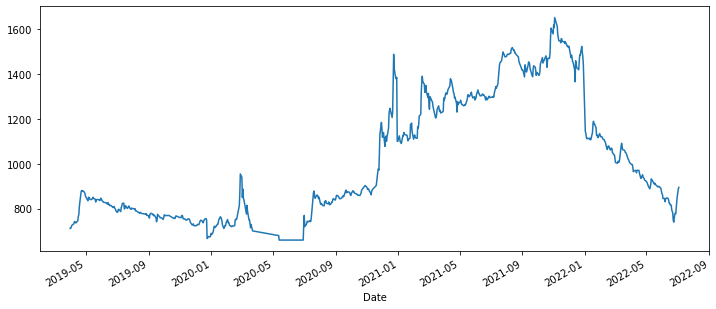

In [3]:
df['Price'].plot(figsize=(12,5))

In [4]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest= adfuller(dataset, autolag = 'AIC')
    print("1. ADF: ", dftest[0])
    print("2. p-value: ", dftest[1])
    print("3. Num of lags: ", dftest[2])
    print("4. Num of observations used for ADF regression and Critical values calculations: ", dftest[3])
    print("5. Critical value: ", dftest[4])
    for key, val in dftest[4].items():
        print('\t',key, ": ", val)
        

In [5]:
ad_test(df['Price'])

1. ADF:  -1.2076105811956734
2. p-value:  0.6703132932765512
3. Num of lags:  18
4. Num of observations used for ADF regression and Critical values calculations:  711
5. Critical value:  {'1%': -3.439580754053961, '5%': -2.865613606467485, '10%': -2.568939269723711}
	 1% :  -3.439580754053961
	 5% :  -2.865613606467485
	 10% :  -2.568939269723711


In [6]:
#data set is not stationary due to high p-value

In [7]:
#we need to seperate trend and seasonality as the data is non-stationary

In [8]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [9]:
stepwise_fit = auto_arima(df['Price'], trace = True, supress_warnings= True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6789.743, Time=2.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6799.455, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6789.809, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6788.880, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6797.525, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6790.115, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6790.197, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6792.102, Time=0.49 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6786.935, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6788.171, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=6788.254, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6787.864, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=6790.160, Time=0.39 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.193 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  730
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -3391.467
Date:                Mon, 04 Jul 2022   AIC                           6786.935
Time:                        22:38:02   BIC                           6796.118
Sample:                             0   HQIC                          6790.478
                                - 730                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1364      0.023      5.929      0.000       0.091       0.181
sigma2       643.2452      6.700     96.010      0.000     630.114     656.377
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             81040.28
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               3.24   Skew:                            -3.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        54.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
print(df.shape)
train= df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape,test.shape)

(730, 8)
(700, 8) (30, 8)


In [23]:
model = sm.tsa.arima.ARIMA(train['Price'], order = (1,1,14))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  700
Model:                ARIMA(1, 1, 14)   Log Likelihood               -3250.435
Date:                Tue, 05 Jul 2022   AIC                           6532.870
Time:                        12:29:21   BIC                           6605.664
Sample:                             0   HQIC                          6561.011
                                - 700                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1412      1.482     -0.095      0.924      -3.045       2.763
ma.L1          0.2657      1.483      0.179      0.858      -2.640       3.171
ma.L2         -0.0084      0.185     -0.045      0.964      -0.370       0.353
ma.L3          0.0211      0.058      0.364      0.716      -0.093       0.135
ma.L4          0.0624      0.055      1.131      0.258      -0.046       0.170
ma.L5         -0.0697      0.093     -0.753      0.452      -0.251       0.112
ma.L6         -0.1087      0.126     -0.864      0.387      -0.355       0.138
ma.L7         -0.0120      0.149     -0.081      0.936      -0.304       0.280
ma.L8          0.0248      0.048      0.511      0.610      -0.070       0.120
ma.L9         -0.0379      0.056     -0.672      0.501      -0.149       0.073
ma.L10        -0.0266      0.076     -0.349      0.727      -0.176       0.123
ma.L11        -0.0990      0.048     -2.076      0.038      -0.192      -0.006
ma.L12        -0.0151      0.151     -0.100      0.920      -0.311       0.281
ma.L13         0.0283      0.040      0.714      0.475      -0.049       0.106
ma.L14        -0.0249      0.083     -0.301      0.763      -0.187       0.137
sigma2       640.3110     15.335     41.754      0.000     610.254     670.368
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             52905.24
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.50   Skew:                            -2.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        45.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
#make predictions on test set
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end, type = 'levels')
print(pred)
pred.index= df.index[start:end+1]
print(pred)

700    898.931587
701    896.983419
702    895.309506
703    894.779411
704    896.645485
705    899.975671
706    898.526844
707    899.131517
708    899.990558
709    900.242675
710    901.080810
711    900.791843
712    900.853312
713    900.969168
714    900.952808
715    900.955118
716    900.954792
717    900.954838
718    900.954831
719    900.954832
720    900.954832
721    900.954832
722    900.954832
723    900.954832
724    900.954832
725    900.954832
726    900.954832
727    900.954832
728    900.954832
729    900.954832
Name: predicted_mean, dtype: float64
Date
2022-05-25    898.931587
2022-05-26    896.983419
2022-05-27    895.309506
2022-05-30    894.779411
2022-05-31    896.645485
2022-06-01    899.975671
2022-06-02    898.526844
2022-06-03    899.131517
2022-06-06    899.990558
2022-06-07    900.242675
2022-06-08    901.080810
2022-06-09    900.791843
2022-06-10    900.853312
2022-06-13    900.969168
2022-06-14    900.952808
2022-06-15    900.955118
2022-06-16    900.

<AxesSubplot:xlabel='Date'>

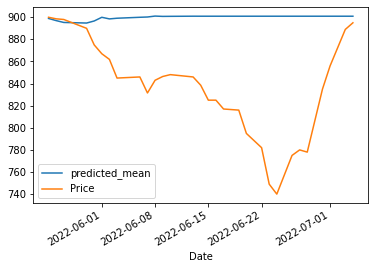

In [25]:
pred.plot(legend=True)
test['Price'].plot(legend=True)

In [26]:
test['Price'].mean()

836.3966666666668

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['Price']))
print(rmse)

74.81260443063235


In [17]:
#retraining model in the entire dataset
model2 = sm.tsa.arima.ARIMA(df['Price'], order = (0,1,1))
model2 = model2.fit()
df.tail()

,Price,Change,Max Price,Min Price,Prev Price,Transaction,Volume,Amount
Date,,,,,,,,
2022-06-28,778.0,-2.0,794.0,765.0,780.0,564,35763,27883600
2022-06-30,835.0,40.0,835.0,800.0,795.0,903,46615,38392100
2022-07-01,856.0,21.0,866.0,833.0,835.0,737,42203,36130100
2022-07-03,889.0,33.0,890.0,856.0,856.0,994,71068,62471500
2022-07-04,895.0,6.0,916.0,893.8,889.0,1742,114314,103998000


In [18]:
index_future_dates = pd.date_range(start='2022-07-04', end ='2022-08-03')
pred = model2.predict(start=len(df), end = len(df)+30, type = 'levels').rename('Arima Predictions')

pred.index = index_future_dates
print(pred)

2022-07-04    895.23791
2022-07-05    895.23791
2022-07-06    895.23791
2022-07-07    895.23791
2022-07-08    895.23791
2022-07-09    895.23791
2022-07-10    895.23791
2022-07-11    895.23791
2022-07-12    895.23791
2022-07-13    895.23791
2022-07-14    895.23791
2022-07-15    895.23791
2022-07-16    895.23791
2022-07-17    895.23791
2022-07-18    895.23791
2022-07-19    895.23791
2022-07-20    895.23791
2022-07-21    895.23791
2022-07-22    895.23791
2022-07-23    895.23791
2022-07-24    895.23791
2022-07-25    895.23791
2022-07-26    895.23791
2022-07-27    895.23791
2022-07-28    895.23791
2022-07-29    895.23791
2022-07-30    895.23791
2022-07-31    895.23791
2022-08-01    895.23791
2022-08-02    895.23791
2022-08-03    895.23791
Freq: D, Name: Arima Predictions, dtype: float64
